## Lecture Note 4 

In [48]:
# logistic 분포의 CDF 그래프 그릭
import numpy as np 
import pandas as pd
import statsmodels.api as sm 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from scipy.stats import logistic



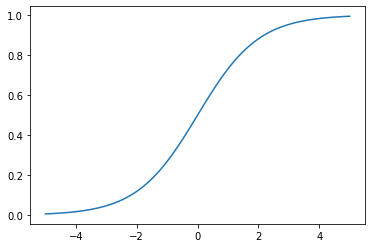

In [9]:
x=np.linspace(-5,5,100)
# y=np.exp(x)/(1+np.exp(x))
y=logistic.cdf(x)
plt.plot(x,y)

In [49]:
file1="c:/temp100/credit_LN4.csv"
credit=pd.read_csv(file1)
credit

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879
...,...,...,...,...,...
9995,9996,No,No,711.555020,52992.378914
9996,9997,No,No,757.962918,19660.721768
9997,9998,No,No,845.411989,58636.156984
9998,9999,No,No,1569.009053,36669.112365


In [50]:
y=credit['default']
x=credit['balance']
y=pd.get_dummies(y)
y=y['Yes']

X=sm.add_constant(x)
logit_model=sm.Logit(y,X).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Tue, 04 Apr 2023   Pseudo R-squ.:                     inf
Time:                        22:33:55   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [16]:
X1=[1,1000]
logit_model.predict(X1)

array([0.00575215])

In [17]:
# Pr(Y=1|balance=2000)
X1=[1,2000]
logit_model.predict(X1)

array([0.58576937])

In [52]:
stu=pd.get_dummies(credit['student'])
credit['stu_yes']=stu['Yes']
credit


,Unnamed: 0,default,student,balance,income,stu_yes
0,1,No,No,729.526495,44361.625074,0
1,2,No,Yes,817.180407,12106.134700,1
2,3,No,No,1073.549164,31767.138947,0
3,4,No,No,529.250605,35704.493935,0
4,5,No,No,785.655883,38463.495879,0
...,...,...,...,...,...,...
9995,9996,No,No,711.555020,52992.378914,0
9996,9997,No,No,757.962918,19660.721768,0
9997,9998,No,No,845.411989,58636.156984,0
9998,9999,No,No,1569.009053,36669.112365,0


In [53]:
x=credit[['stu_yes','income','balance']]
X=sm.add_constant(x)
X

,const,stu_yes,income,balance
0,1.0,0,44361.625074,729.526495
1,1.0,1,12106.134700,817.180407
2,1.0,0,31767.138947,1073.549164
3,1.0,0,35704.493935,529.250605
4,1.0,0,38463.495879,785.655883
...,...,...,...,...
9995,1.0,0,52992.378914,711.555020
9996,1.0,0,19660.721768,757.962918
9997,1.0,0,58636.156984,845.411989
9998,1.0,0,36669.112365,1569.009053


In [21]:
logit_model1=sm.Logit(y,X).fit()
logit_model1.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Tue, 04 Apr 2023   Pseudo R-squ.:                     inf
Time:                        17:31:01   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
stu_yes       -0.6468      0.236     -2.738      0.006      -1.110      -0.184
income      3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
balance        0.0057      0.000     24.737      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [22]:
X1=[1,1,40000,1500]
logit_model1.predict(X1)

array([0.05788194])

In [23]:
X1=[1,0,40000,1500]
logit_model1.predict(X1)

array([0.10499192])

In [54]:
x=credit[['stu_yes','income','balance']]
# y, x (constant included)
clf=LogisticRegression().fit(x,y)  # 주의할 점 : 수업시간에은 대문자 X를 사용했지만, 소문자 x를 사용해야 함. 즉 상수항을 따로 포함할 필요가 없다. 
clf

LogisticRegression()

In [55]:
clf.coef_

array([[-3.89009045e+00, -1.33893466e-04,  4.08201022e-03]])

In [58]:
# roc curve, auc 
pred1=clf.predict_proba(x)
pred1[:,1]

array([0.00269772, 0.00590441, 0.05614562, ..., 0.00064162, 0.18909626,
       0.00025382])

In [59]:
fpr, tpr, thresholds= roc_curve(y,pred1[:,1])

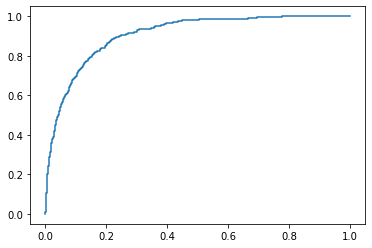

In [60]:
plt.plot(fpr, tpr)

In [65]:
roc_auc_score(y, pred1[:,1])

0.9070324073944639

In [71]:
# confusion matrix
pred2=clf.predict(x)
pred2
confusion_matrix(pred2,y)  # 수업시간에는 (y,pred2) 이렇게 작성했지만, 순서를 바꾸어 입력하기로 함. (pred2,y) 왜 그런지는 4/11 수업시간에 설명예정


array([[9609,  271],
       [  58,   62]], dtype=int64)

In [67]:
(9609+62)/10000

0.9671